# EDA for CompCars Data Set tabular data

In [ ]:
import pandas as pd
import plotly.express as px
import datetime 
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pt= pd.read_excel("/Users/mertdil/Documents/DOD_background_data/data/part_table.xlsx")
pt.head()

make_id  model_id released_year  part_id          image_name  \
0       61       348          2014        7  8dc2acdddc7454.jpg   
1       61       348          2014        7  0d3dedf3e09429.jpg   
2       61       348          2014        6  3ed69717754dd5.jpg   
3       61       348          2014        6  7dfd89c9616719.jpg   
4       61       348          2014        1  3b83aed7bfc11f.jpg   

                                                path  
0  /Users/mertdil/Downloads/DOD_background_data/d...  
1  /Users/mertdil/Downloads/DOD_background_data/d...  
2  /Users/mertdil/Downloads/DOD_background_data/d...  
3  /Users/mertdil/Downloads/DOD_background_data/d...  
4  /Users/mertdil/Downloads/DOD_background_data/d...

In [ ]:
an = pd.read_excel("/Users/mertdil/Documents/DOD_background_data/data/annotation.xlsx")
an.head()

make_id  model_id released_year      image_name  view  bbox_number  \
0      135       947          2009  69ada64edf3ebb     4            1   
1      135       947          2009  b00fef3e12bdf0     4            1   
2      135       947          2009  60b5fa727f82f2     4            1   
3      135       947          2009  13916301245610     4            1   
4      135       947          2009  83ce148be0dcb5     4            1   

          bbox_cor  
0   40 103 769 525  
1    20 33 774 521  
2   64 220 743 447  
3    67 69 744 464  
4  301 254 657 446

In [ ]:
# SÃ¼tunlarÄ±n anlamlarÄ±nÄ± belirle
print("CompCars veri iÃ§in hazÄ±rlanan part_table ve annatation tablolarÄ± SÃ¼tun anlamlarÄ±:")
print("- make_id:  'make_names' hÃ¼cre dizisi 'make_id'den make adlarÄ±na projeksiyonlarÄ± saÄŸlar, ")
print("- model_id: ve 'model_names' hÃ¼cre dizisi 'model_id'den model adlarÄ±na projeksiyonlarÄ± saÄŸlar.")
print("- released_year: aracÄ±n piyasaya Ã§Ä±kÄ±ÅŸ yÄ±lÄ±")
print("- image_name: aracÄ±n resim dosyasÄ±nÄ±n adÄ±")
print("- view: resimde hangi aÃ§Ä±dan Ã§ekildiÄŸi (-1 - uncertain, 1 - front, 2 - rear, 3 - side, 4 - front-side, 5 - rear-side)")
print("- bbox_number: resimde kaÃ§ adet bounding box olduÄŸu")
print("- bbox_cor: bounding box'larÄ±n koordinatlarÄ± (the bounding box in the format 'x1 y1 x2 y2' in pixels, where 1 <= x1 < x2 <= image_width, and 1 <= y1 < y2 <= image_height)")
print("- part_id: aracÄ±n hangi parÃ§asÄ± olduÄŸu( 1 - headlight, 2 - taillight, 3 - fog light, 4 - air intake, 5 - console, 6 - steering wheel, 7 - dashboard, and 8 - gear lever.)")
print("- path: resim dosyasÄ±nÄ±n yolu")

CompCars veri iÃ§in hazÄ±rlanan part_table ve annatation tablolarÄ± SÃ¼tun anlamlarÄ±:
- make_id:  'make_names' hÃ¼cre dizisi 'make_id'den make adlarÄ±na projeksiyonlarÄ± saÄŸlar, 
- model_id: ve 'model_names' hÃ¼cre dizisi 'model_id'den model adlarÄ±na projeksiyonlarÄ± saÄŸlar.
- released_year: aracÄ±n piyasaya Ã§Ä±kÄ±ÅŸ yÄ±lÄ±
- image_name: aracÄ±n resim dosyasÄ±nÄ±n adÄ±
- view: resimde hangi aÃ§Ä±dan Ã§ekildiÄŸi (-1 - uncertain, 1 - front, 2 - rear, 3 - side, 4 - front-side, 5 - rear-side)
- bbox_number: resimde kaÃ§ adet bounding box olduÄŸu
- bbox_cor: bounding box'larÄ±n koordinatlarÄ± (the bounding box in the format 'x1 y1 x2 y2' in pixels, where 1 <= x1 < x2 <= image_width, and 1 <= y1 < y2 <= image_height)
- part_id: aracÄ±n hangi parÃ§asÄ± olduÄŸu( 1 - headlight, 2 - taillight, 3 - fog light, 4 - air intake, 5 - console, 6 - steering wheel, 7 - dashboard, and 8 - gear lever.)
- path: resim dosyasÄ±nÄ±n yolu


The most common viewpoint is 4
- view: resimde hangi aÃ§Ä±dan Ã§ekildiÄŸi (-1 - uncertain, 1 - front, 2 - rear, 3 - side, 4 - front-side, 5 - rear-side)


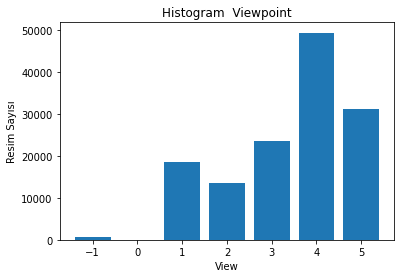

In [ ]:
# en sÄ±k kullanÄ±lan gÃ¶rÃ¼nÃ¼m aÃ§Ä±sÄ±
most_common_view = an['view'].mode()[0]
print(f'The most common viewpoint is {most_common_view}')
print("- view: (-1 - uncertain, 1 - front, 2 - rear, 3 - side, 4 - front-side, 5 - rear-side)")
# annotation tablosundaki verileri histogram olarak gÃ¶rselleÅŸtirme
part_count = an.groupby("view").size()
plt.bar(part_count.index, part_count.values)
plt.title("Histogram  Viewpoint")
plt.xlabel("View")
plt.ylabel("Resim SayÄ±sÄ±")
plt.show()


In [ ]:
# 'view' sÃ¼tununda 'unknown' deÄŸerlerinin sayÄ±sÄ±nÄ± hesapla
num_unknown_views = an[an['view'] == -1].shape[0]

print("Annatation tablosunda toplam {} adet 'unknown' gÃ¶rÃ¼nÃ¼m deÄŸeri var.".format(num_unknown_views))

Annatation tablosunda toplam 780 adet 'unknown' gÃ¶rÃ¼nÃ¼m deÄŸeri var.


In [ ]:
# en sÄ±k kullanÄ±lan part id
most_common_view = pt['part_id'].mode()[0]
print(f'The most common part_id is {most_common_view}')
# 'part_id' sÃ¼tunundaki parÃ§a tÃ¼rlerinin sayÄ±sÄ±nÄ± inceleyin
part_count = pt.groupby("part_id").size()
plt.bar(part_count.index, part_count.values)
plt.title("ParÃ§a TÃ¼rlerinin SayÄ±sÄ±")
plt.xlabel("ParÃ§a ID")
plt.ylabel("SayÄ±")
plt.show()

The most common part_id is 1


In [ ]:
# part_table'dan sÃ¼tunlarÄ± 'part_id', 'make_id', ve 'model_id' olan satÄ±rlarÄ± seÃ§me
part_models = pt[['part_id', 'make_id', 'model_id']]

# belirli bir parÃ§a tÃ¼rÃ¼nÃ¼n her araÃ§ modelinde kaÃ§ kez gÃ¶rÃ¼ndÃ¼ÄŸÃ¼nÃ¼ sayma
part_counts = part_models[part_models['part_id'] == 1].groupby(['make_id', 'model_id']).size().reset_index(name='count')

# sonuÃ§larÄ± gÃ¶rselleÅŸtirme
part_counts.plot(kind='scatter', x='make_id', y='model_id', s=part_counts['count']*10, alpha=0.5)
plt.xlabel('Make ID')
plt.ylabel('Model ID')
plt.title('Distribution of Headlights by Make and Model')


Text(0.5, 1.0, 'Distribution of Headlights by Make and Model')

In [ ]:
# part_table'dan sÃ¼tunlarÄ± 'make_id' ve 'model_id' olan satÄ±rlarÄ± seÃ§me
part_models = pt[['make_id', 'model_id']]

# her araÃ§ modelinde kaÃ§ kez parÃ§a gÃ¶rÃ¼ntÃ¼sÃ¼ olduÄŸunu sayma
part_counts = part_models.groupby(['make_id', 'model_id']).size().reset_index(name='count')

# en Ã§ok parÃ§a gÃ¶rÃ¼ntÃ¼sÃ¼ne sahip araÃ§ modellerini seÃ§me
most_parts_models = part_counts.sort_values(by='count', ascending=False).head()

# sonuÃ§larÄ± gÃ¶rselleÅŸtirme
most_parts_models.plot(kind='bar', x='model_id', y='count', rot=0)
plt.xlabel('Model ID')
plt.ylabel('Number of Part Images')
plt.title('Models with the Most Part Images')

Text(0.5, 1.0, 'Models with the Most Part Images')

Text(0, 0.5, 'Resim SayÄ±sÄ±')

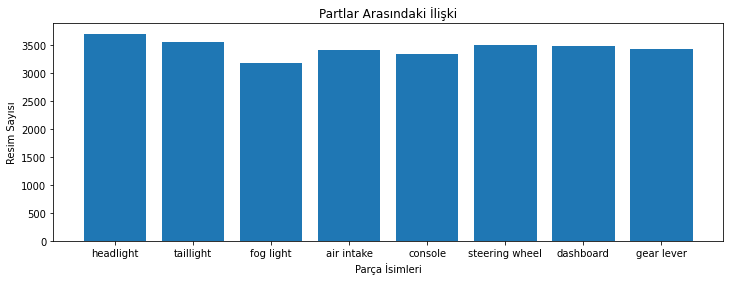

In [ ]:
# Partlar arasÄ±ndaki iliÅŸkiyi gÃ¶rselleÅŸtir
part_counts = part_data.groupby('part_id').count()['image_name'].reset_index()
part_names = {1:'headlight', 2:'taillight', 3:'fog light', 4:'air intake', 5:'console', 6:'steering wheel', 7:'dashboard', 8:'gear lever'}
part_counts['part_name'] = part_counts['part_id'].map(part_names)
f=plt.figure(figsize=(12,4)) 
plt.bar(part_counts['part_name'], part_counts['image_name'])
plt.title('Partlar ArasÄ±ndaki Ä°liÅŸki')
plt.xlabel('ParÃ§a Ä°simleri')
plt.ylabel('Resim SayÄ±sÄ±')


In [ ]:
# Her bir arabanÄ±n bulunduÄŸu parÃ§alarÄ± hesapla
car_parts = pt.groupby(['make_id', 'model_id', 'released_year'])['part_id'].unique()

print(car_parts)

make_id  model_id  released_year
4        509       2012             [7, 6, 1, 8, 4, 3, 2, 5]
                   2013             [7, 6, 1, 8, 4, 3, 2, 5]
                   2014             [7, 6, 1, 8, 4, 3, 2, 5]
         510       2014             [7, 6, 1, 8, 4, 3, 2, 5]
         511       2014             [7, 6, 1, 8, 4, 3, 2, 5]
                                              ...           
162      1636      2012             [7, 6, 1, 8, 4, 3, 2, 5]
                   2013             [7, 6, 1, 8, 4, 3, 2, 5]
                   2014             [7, 6, 1, 8, 4, 3, 2, 5]
         1637      2014             [7, 6, 1, 8, 4, 3, 2, 5]
163      723       2013             [7, 6, 1, 8, 4, 3, 2, 5]
Name: part_id, Length: 1932, dtype: object


In [ ]:
# Her bir arabanÄ±n bulunduÄŸu view hesapla
car_parts = an.groupby(['make_id', 'model_id', 'released_year'])['view'].unique()

print(car_parts)

make_id  model_id  released_year
1        1101      2011             [4, 1, 5, 2, 3]
         1102      2011                [5, 1, 4, 2]
                   2012                      [5, 4]
         1103      2011             [4, 5, 2, 1, 3]
                   2013                   [5, 1, 3]
                                         ...       
163      723       2013             [3, 4, 2, 1, 5]
         724       2010                [5, 3, 4, 1]
         725       2009             [4, 3, 2, 5, 1]
                   2010                      [4, 5]
                   2011             [4, 5, 3, 1, 2]
Name: view, Length: 4446, dtype: object


In [ ]:
# Ä°ki tabloyu birleÅŸtir
merged_df = pd.merge(pt, an, on=['make_id', 'model_id', 'released_year'])

# BirleÅŸtirilmiÅŸ tabloyu yazdÄ±r
print(merged_df.head())


   make_id  model_id released_year  part_id        image_name_x  \
0       61       348          2014        7  8dc2acdddc7454.jpg   
1       61       348          2014        7  8dc2acdddc7454.jpg   
2       61       348          2014        7  8dc2acdddc7454.jpg   
3       61       348          2014        7  8dc2acdddc7454.jpg   
4       61       348          2014        7  8dc2acdddc7454.jpg   

                                                path    image_name_y  view  \
0  /Users/mertdil/Downloads/DOD_background_data/d...  2d6b8c42368c3f     5   
1  /Users/mertdil/Downloads/DOD_background_data/d...  47cfe8f1c4a7e9     3   
2  /Users/mertdil/Downloads/DOD_background_data/d...  f89f2b130b71da     1   
3  /Users/mertdil/Downloads/DOD_background_data/d...  edd66b164b1c14     5   
4  /Users/mertdil/Downloads/DOD_background_data/d...  f13393d196e530     4   

   bbox_number         bbox_cor  
0            1   69 111 725 502  
1            1   35 194 754 500  
2            1  209 107 81

In [ ]:
# Her bir arabanÄ±n bulunduÄŸu view hesapla
car_view = merged_df.groupby(['make_id', 'model_id', 'released_year'])['view'].unique()

print(car_view)

make_id  model_id  released_year
4        509       2012             [4, 3, 5, 2, 1]
                   2013             [4, 3, 5, 1, 2]
                   2014             [1, 4, 3, 5, 2]
         510       2014             [4, 5, 1, 3, 2]
         511       2014             [4, 1, 3, 2, 5]
                                         ...       
162      1636      2012             [2, 4, 3, 5, 1]
                   2013             [2, 5, 4, 1, 3]
                   2014             [5, 4, 1, 3, 2]
         1637      2014             [1, 2, 3, 5, 4]
163      723       2013             [3, 4, 2, 1, 5]
Name: view, Length: 1932, dtype: object


In [ ]:
# Her bir arabanÄ±n bulunduÄŸu view hesapla
car_part = merged_df.groupby(['make_id', 'model_id', 'released_year'])['part_id'].unique()

print(car_part)

make_id  model_id  released_year
4        509       2012             [7, 6, 1, 8, 4, 3, 2, 5]
                   2013             [7, 6, 1, 8, 4, 3, 2, 5]
                   2014             [7, 6, 1, 8, 4, 3, 2, 5]
         510       2014             [7, 6, 1, 8, 4, 3, 2, 5]
         511       2014             [7, 6, 1, 8, 4, 3, 2, 5]
                                              ...           
162      1636      2012             [7, 6, 1, 8, 4, 3, 2, 5]
                   2013             [7, 6, 1, 8, 4, 3, 2, 5]
                   2014             [7, 6, 1, 8, 4, 3, 2, 5]
         1637      2014             [7, 6, 1, 8, 4, 3, 2, 5]
163      723       2013             [7, 6, 1, 8, 4, 3, 2, 5]
Name: part_id, Length: 1932, dtype: object


# Nesne Tesbiti iÃ§in Yolo kÃ¼tÃ¼phanesi (YOLO, Faster R-CNN, SSD ve Mask R-CNN )


YOLO
 YOLO (You Only Look Once), gÃ¶rÃ¼ntÃ¼ veya video Ã¼zerinde nesne algÄ±lama yapmak iÃ§in kullanÄ±lan bir derin Ã¶ÄŸrenme modelidir. YOLO, tek bir aÄŸÄ±n tamamÄ±nÄ± gÃ¶rÃ¼ntÃ¼ye veya videodaki tÃ¼m nesneleri tek seferde algÄ±lamak iÃ§in eÄŸitir. Bu nedenle, daha hÄ±zlÄ± ve daha az hesaplama gÃ¼cÃ¼ gerektirir. Bu Ã¶zellikleri nedeniyle, gerÃ§ek zamanlÄ± nesne algÄ±lama iÃ§in yaygÄ±n bir seÃ§imdir.

YOLO, nesneleri algÄ±larken bir Ã§erÃ§eve iÃ§indeki farklÄ± konumlarÄ± iÃ§in ayrÄ± ayrÄ± tespit etmek yerine, Ã§erÃ§evenin tamamÄ±nÄ± tek seferde deÄŸerlendirir. Bu Ã§erÃ§eveye, bir Ã¶nceden eÄŸitilmiÅŸ model kullanarak belli bir boyuta dÃ¶nÃ¼ÅŸtÃ¼rÃ¼lÃ¼r. ArdÄ±ndan, Ã§erÃ§evenin her bir bÃ¶lgesinde bulunan nesnelerin olasÄ±lÄ±ÄŸÄ±nÄ± tahmin etmek iÃ§in derin bir sinir aÄŸÄ± kullanÄ±lÄ±r.

YOLO, ilk olarak 2016 yÄ±lÄ±nda Joseph Redmon tarafÄ±ndan geliÅŸtirildi ve "You Only Look Once: Unified, Real-Time Object Detection" baÅŸlÄ±klÄ± bir makalede yayÄ±nlandÄ±. Daha sonra, modelin hÄ±z ve doÄŸruluÄŸunu artÄ±rmak iÃ§in birkaÃ§ sÃ¼rÃ¼mÃ¼ geliÅŸtirildi. Son olarak, 2021 yÄ±lÄ±nda YOLOv5 modeli, daha hÄ±zlÄ± ve daha hassas bir nesne algÄ±lama iÃ§in Ã§Ä±karÄ±ldÄ±.

Ã–rnek olarak, bir YOLO modeli kullanarak bir trafik kamerasÄ±ndan Ã§ekilen bir gÃ¶rÃ¼ntÃ¼deki araÃ§larÄ± tespit edebilirsiniz. Model, gÃ¶rÃ¼ntÃ¼nÃ¼n tamamÄ±nÄ± tek seferde iÅŸleyeceÄŸi iÃ§in, tÃ¼m araÃ§larÄ± aynÄ± anda algÄ±layacak ve Ã§erÃ§evenin her bir bÃ¶lgesinde olasÄ± araÃ§larÄ±n konumlarÄ±nÄ± ve sÄ±nÄ±flarÄ±nÄ± tahmin edecektir.

In [ ]:
import os

# Veri kÃ¼mesi konumu
dataset_path = '/Users/mertdil/Documents/DOD_background_data/data'

# GÃ¶rÃ¼ntÃ¼ ve etiket klasÃ¶rleri
image_folder = os.path.join(dataset_path, 'image')
label_folder = os.path.join(dataset_path, 'label')



In [54]:
def open_image_and_label(make_id, model_id, year, image_name):
    """
    Belirtilen Ã¶zelliklere sahip bir gÃ¶rÃ¼ntÃ¼ ve etiket dosyasÄ±nÄ± aÃ§ar ve gÃ¶rÃ¼ntÃ¼ ve etiketi dÃ¶ndÃ¼rÃ¼r.
    """
    # GÃ¶rÃ¼ntÃ¼ ve etiket dosyalarÄ±nÄ±n yolu
    image_path = os.path.join(image_folder, f'{make_id}/{model_id}/{year}/{image_name}.jpg')
    label_path = os.path.join(label_folder, f'{make_id}/{model_id}/{year}/{image_name}.txt')

    # GÃ¶rÃ¼ntÃ¼yÃ¼ aÃ§
    image = Image.open(image_path)

    # Etiketi aÃ§
    with open(label_path, 'r') as f:
        # Viewpoint
        viewpoint = int(f.readline().strip())

        # Bounding box sayÄ±sÄ±
        num_bboxes = int(f.readline().strip())

        # Bounding box koordinatlarÄ±
        bbox_coords = tuple(map(int, f.readline().strip().split()))

    return image, (viewpoint, num_bboxes, bbox_coords)


In [71]:
from PIL import Image

image, label = open_image_and_label(25,	1757,	2010,"cd25e66f5e8553")
image.save("/Users/mertdil/Documents/DOD_background_data/data/image.jpg")
image.show()



Using cache found in /Users/mertdil/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 ðŸš€ 2023-4-17 Python-3.10.6 torch-2.0.0 CPU

Fusing layers... 


requirements: /Users/mertdil/.cache/torch/hub/requirements.txt not found, check failed.


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 567x800 1 car
Speed: 20.2ms pre-process, 177.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
Saved 1 image to runs/detect/exp4


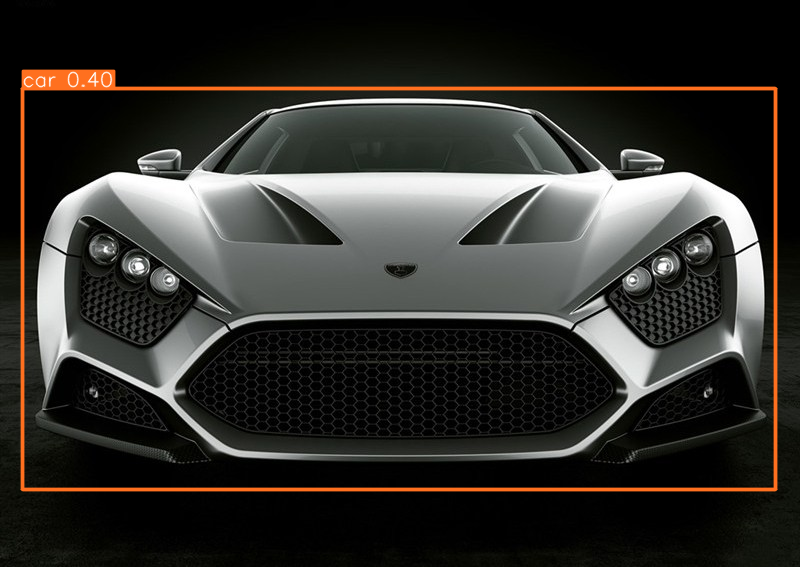

In [72]:

import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# GÃ¶rÃ¼ntÃ¼yÃ¼ yÃ¼kle


# Modeli kullanarak araÃ§larÄ± tespit et
results = model(image)

# SonuÃ§larÄ± yazdÄ±r
results.print()
results.save("/Users/mertdil/Documents/DOD_background_data/data/after_object_detection.jpg")
results.show()

In [69]:
from PIL import Image

image, label = open_image_and_label(28,	1871,	2008,"eaeb5976848566")
image.save("/Users/mertdil/Documents/DOD_background_data/data/image.jpg")

import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# GÃ¶rÃ¼ntÃ¼yÃ¼ yÃ¼kle


# Modeli kullanarak araÃ§larÄ± tespit et
results = model(image)

# SonuÃ§larÄ± yazdÄ±r
results.print()
results.save("/Users/mertdil/Documents/DOD_background_data/data/objectdetection.jpg")
results.show()

Using cache found in /Users/mertdil/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 ðŸš€ 2023-4-17 Python-3.10.6 torch-2.0.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


requirements: /Users/mertdil/.cache/torch/hub/requirements.txt not found, check failed.


image 1/1: 628x910 1 person, 3 cars, 3 potted plants
Speed: 12.0ms pre-process, 180.7ms inference, 2.1ms NMS per image at shape (1, 3, 448, 640)
Saved 1 image to runs/detect/exp3


## Random FotoÄŸraflar Ã¼stÃ¼nden nesne tesbiti


In [31]:
#####for dÃ¶ngÃ¼sÃ¼ ile atama yapma
import os
from PIL import Image
import torch

# Veri kÃ¼mesi konumu
dataset_path = '/Users/mertdil/Documents/DOD_background_data/data'

# GÃ¶rÃ¼ntÃ¼ ve etiket klasÃ¶rleri
image_folder = os.path.join(dataset_path, 'image')
label_folder = os.path.join(dataset_path, 'label')

# YOLOv5 modelini yÃ¼kle
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Rastgele 10 gÃ¶rÃ¼ntÃ¼ iÃ§in nesne tespiti yap
for i in range(10):
    # Rastgele gÃ¶rÃ¼ntÃ¼ seÃ§
    make_id = str(np.random.randint(1, 101))
    model_id = str(np.random.randint(1, 5))
    year = str(np.random.randint(1990, 2022))
    image_names = os.listdir(os.path.join(image_folder, make_id, model_id, year))
    image_name = np.random.choice(image_names).split('.')[0]
    
    # GÃ¶rÃ¼ntÃ¼ ve etiketi aÃ§
    image, _ = open_image_and_label(make_id, model_id, year, image_name)
    
    # Modeli kullanarak araÃ§larÄ± tespit et
    results = model(image)
    
    # SonuÃ§larÄ± yazdÄ±r
    print(f'Image {i+1}: {image_name}.jpg')
    results.print()


Using cache found in /Users/mertdil/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 ðŸš€ 2023-4-17 Python-3.10.6 torch-2.0.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


requirements: /Users/mertdil/.cache/torch/hub/requirements.txt not found, check failed.


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mertdil/Documents/DOD_background_data/data/image/18/3/1991'

#bu yÃ¶ntemin baÅŸarÄ±zlÄ±ÄŸÄ±n nedeni model make idleri bir dÃ¼zende ilerlemiyor

In [33]:
# GÃ¶rÃ¼ntÃ¼ ve etiket klasÃ¶rleri
image_folder = os.path.join(dataset_path, 'image')
label_folder = os.path.join(dataset_path, 'label')

# GÃ¶rÃ¼ntÃ¼ ve etiket dosyalarÄ± iÃ§in Ã¶zellikler
images = [
    (100, 209, 2015, '4'),
    (100, 210, 2012, '5'),
    (139, 1643, 2013, '1'),
]

# GÃ¶rÃ¼ntÃ¼leri ve etiketleri aÃ§ ve araÃ§larÄ± tespit et
for make_id, model_id, year, image_name in images:
    # GÃ¶rÃ¼ntÃ¼yÃ¼ ve etiketi aÃ§
    image, label = open_image_and_label(make_id, model_id, year, image_name)

    # GÃ¶rÃ¼ntÃ¼yÃ¼ YOLOv5 modeli iÃ§in uygun hale getir
    img = model.preprocess(image)

    # Modeli kullanarak araÃ§larÄ± tespit et
    results = model.forward(img, size=image.size)

    # SonuÃ§larÄ± yazdÄ±r
    results.print()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mertdil/Documents/DOD_background_data/data/image/100/209/2015/4.jpg'

#pip install torch torchvision torchaudio

#pip install opencv-python


# GÃ¶rÃ¼ntÃ¼ Segmentasyonu AÅŸamalarÄ±


 R-CNN bilgi
 R-CNN (Region-based Convolutional Neural Network) modeli, nesne tespiti iÃ§in kullanÄ±lan derin Ã¶ÄŸrenme modellerinden biridir. 2014 yÄ±lÄ±nda Ross Girshick ve arkadaÅŸlarÄ± tarafÄ±ndan yayÄ±nlanmÄ±ÅŸtÄ±r.

R-CNN modeli, nesne tespiti iÃ§in Ã¼Ã§ aÅŸamalÄ± bir metodoloji kullanÄ±r. Ä°lk aÅŸamada, giriÅŸ gÃ¶rÃ¼ntÃ¼sÃ¼ bÃ¶lÃ¼mlere ayrÄ±lÄ±r ve her bir bÃ¶lge, Ã¶zellik haritalarÄ±nÄ± oluÅŸturmak iÃ§in Ã¶nceden eÄŸitilmiÅŸ bir evriÅŸimli sinir aÄŸÄ± (Convolutional Neural Network - CNN) kullanÄ±larak Ã¶zellik vektÃ¶rÃ¼ne dÃ¶nÃ¼ÅŸtÃ¼rÃ¼lÃ¼r. Bu iÅŸlem, gÃ¶rÃ¼ntÃ¼deki potansiyel nesnelerin tespit edilmesini saÄŸlar.

Ä°kinci aÅŸamada, her bir bÃ¶lge, Ã¶zellik vektÃ¶rleri ile birlikte, aynÄ± nesne sÄ±nÄ±fÄ±na ait Ã¶rneklerin bulunduÄŸu bir veri kÃ¼mesi Ã¼zerinde eÄŸitilmiÅŸ bir destek vektÃ¶r makineleri (Support Vector Machines - SVM) sÄ±nÄ±flandÄ±rÄ±cÄ±sÄ± kullanÄ±larak sÄ±nÄ±flandÄ±rÄ±lÄ±r. Bu iÅŸlem, bÃ¶lgede bulunan nesnenin hangi sÄ±nÄ±fa ait olduÄŸunu belirler.

ÃœÃ§Ã¼ncÃ¼ ve son aÅŸamada, bÃ¶lgenin iÃ§indeki nesnenin sÄ±nÄ±rlayÄ±cÄ± kutusu (bounding box) Ã§Ä±karÄ±lÄ±r. Bu kutu, nesnenin konumunu ve boyutunu belirler. Bu kutunun doÄŸruluÄŸu, regresyon algoritmalarÄ± kullanÄ±larak iyileÅŸtirilebilir.

Ã–rnek olarak, R-CNN modeli kullanÄ±larak yapÄ±labilen bir uygulama, araÃ§larÄ±n tespit edilmesidir. Bu uygulamada, Ã¶ncelikle giriÅŸ gÃ¶rÃ¼ntÃ¼sÃ¼ bÃ¶lÃ¼mlere ayrÄ±lÄ±r ve her bir bÃ¶lge, Ã¶zellik haritalarÄ± oluÅŸturmak iÃ§in Ã¶nceden eÄŸitilmiÅŸ bir CNN kullanÄ±larak Ã¶zellik vektÃ¶rÃ¼ne dÃ¶nÃ¼ÅŸtÃ¼rÃ¼lÃ¼r. Daha sonra, SVM sÄ±nÄ±flandÄ±rÄ±cÄ±sÄ± kullanÄ±larak her bir bÃ¶lge, araÃ§ veya araÃ§ olmayan sÄ±nÄ±flarÄ±ndan birine ayrÄ±lÄ±r. Son olarak, araÃ§larÄ±n konumlarÄ± belirlenir ve gÃ¶rÃ¼ntÃ¼deki her bir araÃ§ iÃ§in sÄ±nÄ±rlayÄ±cÄ± kutular Ã§Ä±karÄ±lÄ±r.

## R-CNN modeli kurma ve Ã§alÄ±ÅŸtÄ±rma

### R-CNN model Ã§alÄ±ÅŸma_1

In [34]:

import torchvision
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)


Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /Users/mertdil/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 170M/170M [00:15<00:00, 11.6MB/s] 


In [35]:
import torch
import torchvision.transforms as T
from PIL import Image

# GÃ¶rÃ¼ntÃ¼yÃ¼ yÃ¼kle
#image = Image.open("image.jpg")

# DÃ¶nÃ¼ÅŸtÃ¼rmeleri tanÄ±mla
transform = T.Compose([
    T.ToTensor()
])

# GÃ¶rÃ¼ntÃ¼yÃ¼ tensÃ¶re dÃ¶nÃ¼ÅŸtÃ¼r
image_tensor = transform(image)

# Modeli kullanarak nesne tespiti ve segmentasyon yap
model.eval()
with torch.no_grad():
    prediction = model([image_tensor])[0]

# SonuÃ§larÄ± yazdÄ±r
print(prediction.keys())



dict_keys(['boxes', 'labels', 'scores', 'masks'])


### R-CNN modeli Ã¼stÃ¼ne Ã§alÄ±ÅŸma_2

In [41]:
from PIL import Image
import torchvision.transforms as T

# GÃ¶rÃ¼ntÃ¼yÃ¼ yÃ¼kle
#image = Image.open('image.jpg')

# GÃ¶rÃ¼ntÃ¼yÃ¼ dÃ¶nÃ¼ÅŸtÃ¼r
transform = T.Compose([T.ToTensor()])
image = transform(image)


In [42]:
model.eval()

# GiriÅŸ gÃ¶rÃ¼ntÃ¼sÃ¼ Ã¼zerinde tahmin yap
predictions = model([image])

# SÄ±nÄ±flandÄ±rma ve sÄ±nÄ±rlayÄ±cÄ± kutularÄ± ayÄ±kla
scores = predictions[0]['scores'].detach().numpy()
boxes = predictions[0]['boxes'].detach().numpy()

# Maske tahminlerini ayÄ±kla
masks = predictions[0]['masks'].detach().numpy()

# KesilmiÅŸ gÃ¶rÃ¼ntÃ¼leri al
masked_images = []
for i in range(len(scores)):
    if scores[i] > 0.5:
        mask = masks[i, 0]
        masked_image = image.permute(1, 2, 0).detach().numpy() * mask[..., np.newaxis]
        masked_images.append(masked_image)

# Maske tahminlerini gÃ¶rselleÅŸtir
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=len(masked_images), figsize=(10, 10))

for i in range(len(masked_images)):
    ax[i].imshow(masked_images[i])


### R-CNN model Ã§alÄ±ÅŸma_3 (tek bir gÃ¶rÃ¼ntÃ¼de baÅŸarÄ± elde edildi.)

In [73]:
import torch
import torchvision
import os
from PIL import Image
import numpy as np

# Veri kÃ¼mesi konumu
dataset_path = '/Users/mertdil/Documents/DOD_background_data/data'

# GÃ¶rÃ¼ntÃ¼ ve etiket klasÃ¶rleri
image_folder = os.path.join(dataset_path, 'image')
label_folder = os.path.join(dataset_path, 'label')

# Mask R-CNN modelini yÃ¼kle
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

# Modeli deÄŸerlendirmeye ayarla
model.eval()

# GÃ¶rÃ¼ntÃ¼yÃ¼ yÃ¼kle
#image_path = os.path.join(image_folder, f'{make_id}/{model_id}/{year}/{image_name}.jpg')
#image = Image.open(image_path)

image, label = open_image_and_label(25,	1757,	2010,"cd25e66f5e8553")
#image.save("/Users/mertdil/Documents/DOD_background_data/data/image.jpg")

# Ã–nceden eÄŸitilmiÅŸ modeli kullanarak segmentasyon yap
with torch.no_grad():
    prediction = model([torchvision.transforms.functional.to_tensor(image)])

# SonuÃ§larÄ± yazdÄ±r
print(prediction)

# Segmentasyon haritasÄ±nÄ± alma
mask = prediction[0]['masks'][0, 0].mul(255).byte().cpu().numpy()

# Segmentasyon haritasÄ±nÄ± PIL gÃ¶rÃ¼ntÃ¼sÃ¼ne dÃ¶nÃ¼ÅŸtÃ¼rme
mask_image = Image.fromarray(mask)

# Segmentasyon haritasÄ±nÄ± kaydetme
mask_image.save("/Users/mertdil/Documents/DOD_background_data/data/datasegmentation_mask.jpg")
mask_image.show()


[{'boxes': tensor([[ 19.70544,  99.86528, 792.30194, 475.45605],
        [ 41.04229, 156.06412, 764.30157, 458.82254],
        [143.62669, 319.05301, 632.98273, 443.04199],
        [  0.00000, 392.01141, 790.04895, 557.92065],
        [167.05870, 310.25391, 604.56989, 445.35974]]), 'labels': tensor([ 3, 77, 76, 67, 77]), 'scores': tensor([0.95199, 0.61133, 0.18812, 0.05592, 0.05514]), 'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 

# ResNET ve GAN Modeli Kurulumu



 Veri seti oluÅŸturduktan sonra, ResNet ve GAN modellerini kurabilirsiniz. ResNet modeli, gÃ¶rÃ¼ntÃ¼yÃ¼ Ã¶n iÅŸleme yapmak iÃ§in kullanÄ±labilir. GAN modeli ise, arka plan deÄŸiÅŸtirme iÅŸlemini gerÃ§ekleÅŸtirmek iÃ§in kullanÄ±labilir.

